In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
sdtypes ={'Store_Number':str,'Zip_Code':str}

In [5]:
# stores_clust_info_combined3= pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined3.csv',dtype=sdtypes,index_col=0)

In [6]:
stores_clust_info_combined4= pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined4.csv',dtype=sdtypes,index_col=0)

In [7]:
stores_clust_info_combined4.head()

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,...,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled,label_2,Store_Cluster,Convenience,Large,Medium,Smaller
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,22050030.17,...,-2.686817,-0.669103,-0.793981,-2.003923,0,Convenience,True,False,False,False
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,48408685.66,...,-2.548573,-0.773541,-0.660332,-0.956813,2,Medium,False,False,True,False
2,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY,Dyno's #40 / Spencer,24308995.32,...,-2.410329,-0.851869,-0.727157,-2.003923,0,Convenience,True,False,False,False
3,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO,Dyno's #29 / Emmetsburg,11723322.21,...,-2.963305,-0.616885,-0.660332,-0.956813,2,Medium,False,False,True,False
4,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST,Dyno's #41 / Albert City,6766721.37,...,-2.963305,-0.825759,-0.793981,-2.003923,3,Smaller,False,False,False,True


In [8]:
stores_clust_info_combined4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1925 entries, 0 to 1924
Data columns (total 62 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store_Number                      1925 non-null   object 
 1   Store_Name                        1925 non-null   object 
 2   Address                           1925 non-null   object 
 3   City                              1925 non-null   object 
 4   Zip_Code                          1925 non-null   object 
 5   Store_Location                    1769 non-null   object 
 6   County_Number                     1925 non-null   int64  
 7   County                            1925 non-null   object 
 8   Store_Name.1                      1925 non-null   object 
 9   store_revenue                     1925 non-null   float64
 10  tot_num_unique_items              1925 non-null   int64  
 11  num_unique_clusters               1925 non-null   int64  
 12  tot_it

In [9]:
stores_clust_info_combined4.columns

Index(['Store_Number', 'Store_Name', 'Address', 'City', 'Zip_Code',
       'Store_Location', 'County_Number', 'County', 'Store_Name.1',
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 'rev_Quick_Shots',
       'rev_Volume_For_Dollar', 'prod_count_pct_Cheap',
       'prod_count_pct_High_End', 'prod_count_pct_Moderately_High',
       'prod_count_pct_Most_Variety', 'prod_count_pct_Popular_Bottles',
       'prod_count_pct_Quick_Shots', 'prod_count_pct_Volume_For_Dollar',
       'item_Cheap', 'item_High_End', 'item_Moderately_High',
       'item_Most_Variety', 'item_Popular_Bottles', 'item_Quick_Shots',
       'item_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar', 'store_revenue_scaled',
       'tot_num_unique_items_scaled', 're

In [10]:
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns=['cl_Cheap_scaled', 'cl_High_End_scaled', 'cl_Moderately_High_scaled',
       'cl_Most_Variety_scaled', 'cl_Popular_Bottles_scaled',
       'cl_Quick_Shots_scaled', 'cl_Volume_For_Dollar_scaled',
       'num_unique_clusters_scaled', 'label_2', 'Store_Cluster', 'Convenience',
       'Large', 'Medium', 'Smaller'])  #.head(2)

outliers removed and features scaled in notebook -> Kmeans Stores 18 outlier stores removed 

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

def linkage_frame(data):
    row_clusters = linkage(data, method='complete', metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df

In [12]:
# from sklearn.preprocessing import StandardScaler

In [13]:
# scaler = StandardScaler()

In [14]:
# stores_clust_info_combined3[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'orders_scaled' ]] = scaler.fit_transform\
#                                            (most_variety[['Bottle_Volume','Bottle_Retail','orders'] ])
                                                   


In [15]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']

make copy of stores_clust_info_combined4_copy

In [16]:
stores_clust_info_combined4_copy = stores_clust_info_combined4.copy()

set index to 'Store_Number'

In [17]:
stores_clust_info_combined4 = stores_clust_info_combined4.set_index('Store_Number')

In [18]:
linkage_df = linkage_frame(stores_clust_info_combined4[cluster_cols])

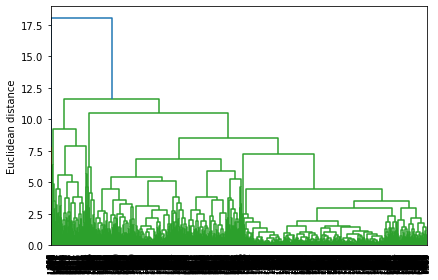

In [19]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

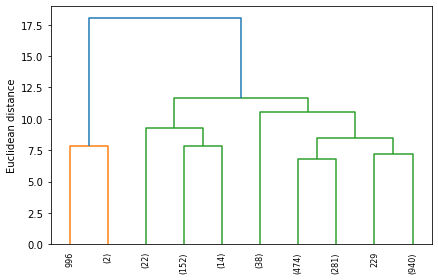

In [20]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, truncate_mode='lastp', p = 10, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [21]:
#dpg 3 clusters

In [22]:
linkage_df

,row label 1,row label 2,distance,no. items in clust.
cluster 1,75.0,402.0,0.027164,2.0
cluster 2,1561.0,1833.0,0.032167,2.0
cluster 3,709.0,1737.0,0.038063,2.0
cluster 4,1258.0,1825.0,0.038565,2.0
cluster 5,966.0,1498.0,0.038748,2.0
...,...,...,...,...
cluster 1920,3840.0,3841.0,8.496260,1696.0
cluster 1921,3839.0,3843.0,9.254354,188.0
cluster 1922,3838.0,3844.0,10.523810,1734.0
cluster 1923,3845.0,3846.0,11.638068,1922.0


In [23]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()

In [24]:
hier.set_params(n_clusters=3)
hier.fit(stores_clust_info_combined4[cluster_cols])

AgglomerativeClustering(n_clusters=3)

In [25]:
hier.get_params()

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': 3}

In [27]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [28]:
hier.set_params(n_clusters=3)
hier.fit(stores_clust_info_combined4[cluster_cols])
labels = hier.labels_
metrics.silhouette_score(stores_clust_info_combined4[cluster_cols], labels, metric='euclidean')

0.4093786231309391

In [29]:
hier.set_params(n_clusters=4)
hier.fit(stores_clust_info_combined4[cluster_cols])
labels = hier.labels_
metrics.silhouette_score(stores_clust_info_combined4[cluster_cols], labels, metric='euclidean')

0.4201812008813292

In [30]:
hier.set_params(n_clusters=5)
hier.fit(stores_clust_info_combined4[cluster_cols])
labels = hier.labels_
metrics.silhouette_score(stores_clust_info_combined4[cluster_cols], labels, metric='euclidean')

0.38497481318593446

In [31]:
hier.set_params(n_clusters=6)
hier.fit(stores_clust_info_combined4[cluster_cols])
labels = hier.labels_
metrics.silhouette_score(stores_clust_info_combined4[cluster_cols], labels, metric='euclidean')

0.2546005081484034